## Consumindo dados da API do Youtube, analisando com Pandas Profiling e salvando no Cloud Storage


Vamos utilizar a API do Youtube para consumir dados de uma playlist do Youtube, vamos realizar uma análise sobre os dados coletados utilizando o Pandas Profiling e armazenar esses resultados no Cloud Storage.

In [ ]:
pip install -r requirements.txt

### 1. Consumindo dados da API do Youtube

A API de dados do YouTube permite a incorporação de funções normalmente executadas no site do YouTube em seu próprio site ou aplicativo.

Para consumir seus dados, deve-se ter uma conta do Google e ativar a API. Para mais detalhes veja a documentação [Youtube data API](https://developers.google.com/youtube/v3/getting-started?hl=pt-br). Vamos utilizar a Youtube Data API v3

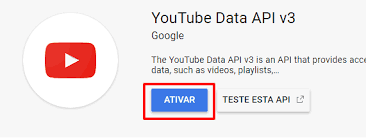

In [2]:
from googleapiclient.discovery import build

Para se conectar a API existem duas formas:

* Autenticação OAuth 2.0
* Através da chave de API

Neste momento, vamos utilizar a chave de API.

In [3]:
APIKey = "SUA-CHAVE-DE-API"

In [4]:
youtube = build('youtube', 'v3', developerKey=APIKey)

Fiz uma breve pesquisa sobre Python e Datascience, vamos extrair dados da playlist da seguinte Playlist [Data Science Full Course For Beginners | Python Data Science Tutorial | Data Science With Python](https://www.youtube.com/playlist?list=PLeo1K3hjS3us_ELKYSj_Fth2tIEkdKXvV).

Para isso vamos precisar do ID da playlist, o id é o grupo de caracteres após o nome list na URL

In [5]:
playlistId = 'PLeo1K3hjS3us_ELKYSj_Fth2tIEkdKXvV'
playlistName = 'Data Science Full Course For Beginners | Python Data Science Tutorial | Data Science With Python'
nextPage_token = None

In [6]:
videosPlaylist = []

while True:
  response = youtube.playlistItems().list(part='snippet', playlistId = playlistId, maxResults=50, pageToken=nextPage_token).execute()
  videosPlaylist += response['items']
  nextPage_token = response.get('nestPageToken')
  if nextPage_token is None:
    break

In [7]:
print("Total de vídeos da Playlist ", len(videosPlaylist))

Total de vídeos da Playlist  50


In [8]:
videosId = list(map(lambda x: x['snippet']['resourceId']['videoId'], videosPlaylist))

In [9]:
statistic = []

for videoId in videosId:
  response = youtube.videos().list(part='statistics', id=videoId).execute()
  statistic += response['items']

In [10]:
videos_title = list(map(lambda x: x['snippet']['title'], videosPlaylist))
url_thumbnails = list(map(lambda x: x['snippet']['thumbnails']['high']['url'], videosPlaylist))
published_date = list(map(lambda x: str(x['snippet']['publishedAt']), videosPlaylist)) 
video_description = list(map(lambda x: x['snippet']['description'], videosPlaylist))
videoid = list(map(lambda x: x['snippet']['resourceId']['videoId'], videosPlaylist))

In [11]:
liked = list(map(lambda x: int(x['statistics']['likeCount']), statistic))
disliked = list(map(lambda x: int(x['statistics']['dislikeCount']), statistic))
views = list(map(lambda x: int(x['statistics']['viewCount']), statistic))
comment = list(map(lambda x: int(x['statistics']['commentCount']), statistic))

In [12]:
from datetime import datetime 

extraction_date = [str(datetime.now())]*len(videosId)

In [13]:
import pandas as pd

In [14]:
df = pd.DataFrame({'Titulo':videos_title,
      'ID Video':videoid,
      'Descrição do Video':video_description,
      'Data de Publicação':published_date,
      'Data de Extração':extraction_date,
      'Likes':liked,
      'Dislikes':disliked,
      'Views':views,
      'Comentários':comment,
      'URL': url_thumbnails})
df.head()

,Titulo,ID Video,Descrição do Video,Data de Publicação,Data de Extração,Likes,Dislikes,Views,Comentários,URL
0,What is Data Science? | Free Data Science Cour...,JL_grPUnXzY,We will understand what is data science by loo...,2019-12-28T15:58:23Z,2021-04-13 15:41:36.480937,1455,12,97015,180,https://i.ytimg.com/vi/JL_grPUnXzY/hqdefault.jpg
1,Learn data science for beginners (How to learn...,Vn_mmOuQkSA,Even if you have non technical background you ...,2020-01-28T23:58:43Z,2021-04-13 15:41:36.480937,6291,58,159430,385,https://i.ytimg.com/vi/Vn_mmOuQkSA/hqdefault.jpg
2,1. Install python on windows [Python 3 Program...,6lBPM-MiGNI,Step by step process on how to install python ...,2019-12-28T16:00:33Z,2021-04-13 15:41:36.480937,409,11,44610,32,https://i.ytimg.com/vi/6lBPM-MiGNI/hqdefault.jpg
3,2. Variables in python [Python 3 Programming T...,8tCe1P_cgoY,In this python programming tutorial for beginn...,2019-12-28T16:01:07Z,2021-04-13 15:41:36.480937,444,10,48387,23,https://i.ytimg.com/vi/8tCe1P_cgoY/hqdefault.jpg
4,3. Numbers [Python 3 Programming Tutorials],pd2_ZbhFT38,This python tutorial gives you an understandin...,2019-12-28T16:01:26Z,2021-04-13 15:41:36.480937,413,7,37737,29,https://i.ytimg.com/vi/pd2_ZbhFT38/hqdefault.jpg


In [27]:
df.to_csv('youtube.csv')

### 2. Analisando o Dataframe com Pandas Profilling

Vamos fazer uma pequena análise dos dados obtidos utilizando a biblioteca Pandas Profilling

In [16]:
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-c4kpz4kv because the default path (/home/valeria.silva/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [17]:
profile = ProfileReport(df, title='Youtube Analytics',html={'style':{'full_width':True}})

In [18]:
profile

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
profile.to_file("report_youtube.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 3. Migrando os dados para o Google Cloud Storage

In [24]:
from google.cloud import storage
client = storage.Client()

In [31]:
bucket = client.get_bucket('analytics-pipelines')

In [32]:
blob = bucket.blob('report_youtube.html')

In [33]:
blob.upload_from_filename(filename='report_youtube.html')